# Assignment 1 - Flower Drawing Optimization

Who doesn't love flowers? In this assignment we will plot many beautiful flowers using my very special custom algorithm. It is blazingly fast, and chock-a-block full of state of the art optimizations!

In [2]:
# Ignore me
%load_ext autoreload

In [12]:
# Ignore me - im just an import block
%autoreload 2

from SlowFlowers import BadFlowerDrawer
import matplotlib.pyplot as plt
import random as rnd
import time
import cProfile
import subprocess
from IPython.display import Image

## Lets use my super special algorithm to plot a flower
As you can see, we can specify the number of petals, the center of the flower, and the size you would like it to be.

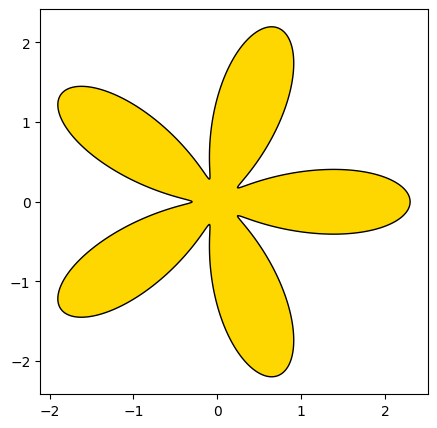

In [9]:
bad_flower_instance = BadFlowerDrawer()
x, y = zip(*bad_flower_instance.draw_one_flower(1))

plt.figure(figsize=(5,5))
plt.fill(x,y, edgecolor='black', facecolor='gold')
plt.show()

## Lets plot even more fun flowers
I have also added a feature to plot as many flowers as you wish! All you have to do is supply a list of tuples containing the center point and size of the flower you would like to draw, and my algorithm will take care of the rest.

In [10]:
inputs = [(19, 21, 2), (15, 11, 3), (19, 4, 2), (7, 20, 2), (5, 6, 1)]
print(inputs)

[(19, 21, 2), (15, 11, 3), (19, 4, 2), (7, 20, 2), (5, 6, 1)]


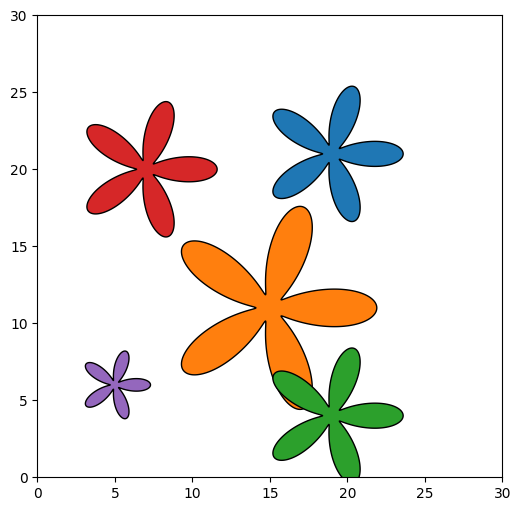

Total Time to compute 5 flowers: 118.21 seconds


In [11]:

start = time.perf_counter()
flowers = bad_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()
good_flowers = flowers

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)
for t in flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

print(f"Total Time to compute 5 flowers: {stop-start:.2f} seconds")

## And it only took way to long to draw all of those flowers...
(I don't know how long it took on your system, but on my old laptop it took about 120 seconds (2 minutes))
Huh, thats not as fast as I had hoped... Maybe we can do some profiling to figure out where I am losing all of this time...

In [13]:
cProfile.run('bad_flower_instance.draw_many_flower(inputs)')

         156575074 function calls in 294.586 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002  294.586  294.586 <string>:1(<module>)
    12505   72.581    0.006  294.498    0.024 SlowFlowers.py:12(place_in_list)
 15656255   75.188    0.000  200.293    0.000 SlowFlowers.py:40(compute_point)
 31312510   81.168    0.000  115.820    0.000 SlowFlowers.py:48(polar_to_cartesian)
        5    0.086    0.017  294.583   58.917 SlowFlowers.py:54(draw_one_flower)
        1    0.000    0.000  294.584  294.584 SlowFlowers.py:71(draw_many_flower)
        1    0.000    0.000  294.586  294.586 {built-in method builtins.exec}
    12510    0.014    0.000    0.014    0.000 {built-in method builtins.len}
 31287500   21.567    0.000   21.567    0.000 {built-in method math.atan2}
 46968765   26.194    0.000   26.194    0.000 {built-in method math.cos}
 31312510   17.743    0.000   17.743    0.000 {built-in method math.s

## While this is useful info, Its quite dense to read - lets make it a graphical view

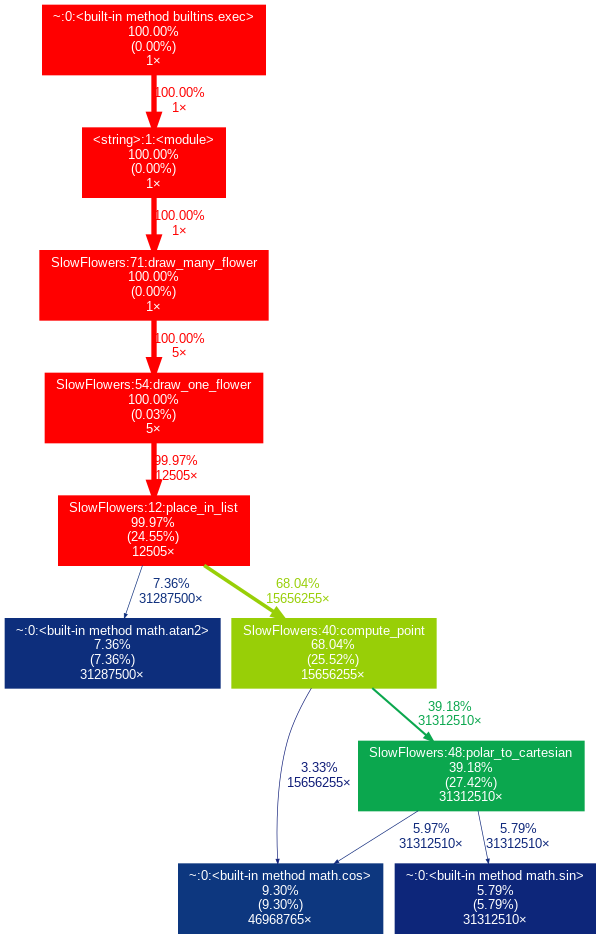

In [14]:
cProfile.run('bad_flower_instance.draw_many_flower(inputs)', 'flowers.pstats')
subprocess.call(['python3', 'gprof2dot.py', '-f', 'pstats', './flowers.pstats', '-o', 'flowers.dot' ])
subprocess.call(['dot', '-Tpng', '-o', 'flowers.png', 'flowers.dot' ])
Image('flowers.png')

# Why is my code so bad???
## This is your asignment sandbox location

In the next cells is setup a place to test your updated flower code.

- Help me fix my slow flower class, and make it faster. 
- You can run it here, and see if the circles are the same.

**If the circles are not the same here, they will not be the same on the autograder, So be sure to test them here first!**

In [15]:
def flowers_are_same(good_flowers, suspicious_flowers):
    """Compares two sets of flowers and determines weather they are same"""
    for good_flower, sus_flower in zip(good_flowers, suspicious_flowers):
        if good_flower != sus_flower:
            return False
        return True

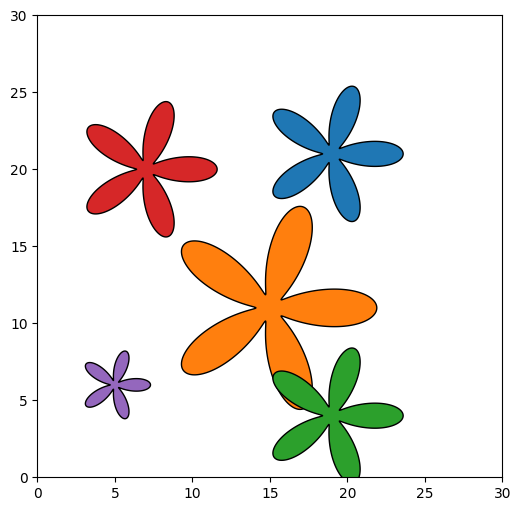

Total Time to compute 5 flowers: 115.66 seconds
The flowers ARE the same!


In [16]:
from FastFlowers import FastFlowerDrawer

fast_flower_instance = FastFlowerDrawer()


start = time.perf_counter()
fast_flowers = fast_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)

for t in fast_flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

tot_time = stop-start
print(f"Total Time to compute 5 flowers: {tot_time:.2f} seconds")

same = flowers_are_same(good_flowers, fast_flowers)
print(f"The flowers {'ARE' if same else 'ARE NOT'} the same!")

# When the flowers are not the same it will look like this

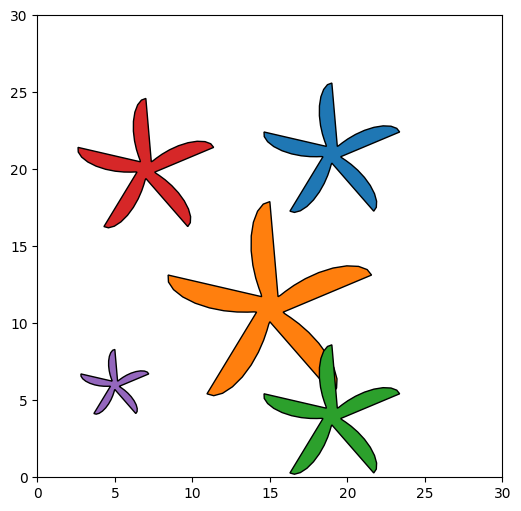

Total Time to compute 5 flowers: 0.06 seconds
The flowers ARE NOT the same!


In [17]:
from NotReallyFlowers import NotReallyAFlowerDrawer

not_flower_instance = NotReallyAFlowerDrawer()


start = time.perf_counter()
not_flowers = not_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)

for t in not_flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

tot_time = stop-start
print(f"Total Time to compute 5 flowers: {tot_time:.2f} seconds")

same = flowers_are_same(good_flowers, not_flowers)
print(f"The flowers {'ARE' if same else 'ARE NOT'} the same!")

# Your Assignment

1. Make `FastFlowers.py` *actually* fast
2. Test your faster code with the above testing structure
3. **Ensure** that your flowers match the original flowers for points!